# WeatherPy
----

### Conclusions

1. Temperature increases as we get closer to the equator. However, the highest temperature is recorded near the 20  degree mark. Further analysis and data is needed to establish the cause of this. 

2. Cloudiness and humidity do not show strong correlation to latitude. These findings suggest that there are other factors impacting these variables. Example of such potential factors are altitude and time of the day. 

3. As one moves away from the equator, there are clusters of cities that experience 0% cloudiness. Other cluster points are 40% and 80% cloudiness. On the other hand, the analysis shows that, for the cities tested, wind speeds greater than 20mph are rare. 
----


In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)    
# Print the city count to confirm sufficient count
len(cities)

610

In [15]:
#startthe data frame 
weather_data=pd.DataFrame(cities,columns=["City"])
weather_data["Country"]=""
weather_data["Date"]=""
weather_data["Cloudiness"]=""
weather_data["Humidity"]=""
weather_data["Lat"]=""
weather_data["Lng"]=""
weather_data["Max Temp"]=""
weather_data["Wind Speed"]=""
weather_data.head()

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,,,,,,,,
1,ulladulla,,,,,,,,
2,horsching,,,,,,,,
3,victoria,,,,,,,,
4,lesnoy,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
results=[]

#make an API call for each city in cities
for index, row in weather_data.iterrows():
    city_name=row["City"]
    query_url = f"{url}appid={api_key}&q={city_name}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    results.append(weather_json)
    try:
        print(f'Processing Record {index+1} of {len(cities)} | {row["City"]}')
        weather_data.loc[index,"Country"]=weather_json["sys"]["country"]
        weather_data.loc[index,"Date"]=weather_json["dt"]
        weather_data.loc[index,"Cloudiness"]=weather_json["clouds"]["all"]
        weather_data.loc[index,"Humidity"]=weather_json["main"]["humidity"]
        weather_data.loc[index,"Lat"]=weather_json["coord"]["lat"]
        weather_data.loc[index,"Lng"]=weather_json["coord"]["lon"]
        weather_data.loc[index,"Max Temp"]=weather_json["main"]["temp_max"]
        weather_data.loc[index,"Wind Speed"]=weather_json["wind"]["speed"]
    except (KeyError, IndexError):
        print("City not found. Skipping ...")  

#Mark the end of api requests
print("-----------------------------") 
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 of 610 | saint-philippe
Processing Record 2 of 610 | ulladulla
Processing Record 3 of 610 | horsching
Processing Record 4 of 610 | victoria
Processing Record 5 of 610 | lesnoy
Processing Record 6 of 610 | georgetown
Processing Record 7 of 610 | ambilobe
Processing Record 8 of 610 | alamogordo
Processing Record 9 of 610 | atuona
Processing Record 10 of 610 | butaritari
Processing Record 11 of 610 | mataura
Processing Record 12 of 610 | saleaula
City not found. Skipping ...
Processing Record 13 of 610 | cayenne
Processing Record 14 of 610 | alakurtti
Processing Record 15 of 610 | ushuaia
Processing Record 16 of 610 | coquimbo
Processing Record 17 of 610 | albany
Processing Record 18 of 610 | mys shmidta
City not found. Skipping ...
Processing Record 19 of 610 | mar del plata
Processing Record 20 of 610 | faanui
Processing Record 21 of 610 | ribeira grande
Processing Record 22 of 610 | bredasdorp
Processing Record 23 of 610 | bluff
Processing Record 24 of 610 | falealu

Processing Record 188 of 610 | rawson
Processing Record 189 of 610 | kaitangata
Processing Record 190 of 610 | ahipara
Processing Record 191 of 610 | morant bay
Processing Record 192 of 610 | awjilah
Processing Record 193 of 610 | egvekinot
Processing Record 194 of 610 | jibuti
City not found. Skipping ...
Processing Record 195 of 610 | upernavik
Processing Record 196 of 610 | san ignacio
Processing Record 197 of 610 | sao joao da barra
Processing Record 198 of 610 | newtownards
Processing Record 199 of 610 | dikson
Processing Record 200 of 610 | san cristobal
Processing Record 201 of 610 | bitung
Processing Record 202 of 610 | dingle
Processing Record 203 of 610 | necochea
Processing Record 204 of 610 | deh rawud
City not found. Skipping ...
Processing Record 205 of 610 | norman wells
Processing Record 206 of 610 | cabo san lucas
Processing Record 207 of 610 | kununurra
Processing Record 208 of 610 | fukue
Processing Record 209 of 610 | porto tolle
Processing Record 210 of 610 | maheb

Processing Record 379 of 610 | kozhevnikovo
Processing Record 380 of 610 | kesova gora
Processing Record 381 of 610 | bullhead city
Processing Record 382 of 610 | aporawan
City not found. Skipping ...
Processing Record 383 of 610 | machinga
Processing Record 384 of 610 | abapo
Processing Record 385 of 610 | kidal
Processing Record 386 of 610 | byron bay
Processing Record 387 of 610 | nosy varika
Processing Record 388 of 610 | puerto rondon
Processing Record 389 of 610 | novozavidovskiy
Processing Record 390 of 610 | morehead
Processing Record 391 of 610 | iskateley
Processing Record 392 of 610 | turukhansk
Processing Record 393 of 610 | baker city
Processing Record 394 of 610 | bireun
Processing Record 395 of 610 | concarneau
Processing Record 396 of 610 | taltal
Processing Record 397 of 610 | ambodifototra
City not found. Skipping ...
Processing Record 398 of 610 | bilma
Processing Record 399 of 610 | manbij
Processing Record 400 of 610 | ornskoldsvik
Processing Record 401 of 610 | ay

Processing Record 573 of 610 | rizhao
Processing Record 574 of 610 | sulangan
Processing Record 575 of 610 | nuuk
Processing Record 576 of 610 | monteagudo
Processing Record 577 of 610 | santa fe
Processing Record 578 of 610 | ajdabiya
Processing Record 579 of 610 | lazaro cardenas
Processing Record 580 of 610 | boguchany
Processing Record 581 of 610 | alamosa
Processing Record 582 of 610 | dillon
Processing Record 583 of 610 | raudeberg
Processing Record 584 of 610 | shimoda
Processing Record 585 of 610 | san juan
Processing Record 586 of 610 | abay
Processing Record 587 of 610 | colares
Processing Record 588 of 610 | abu dhabi
Processing Record 589 of 610 | broome
Processing Record 590 of 610 | lujiang
Processing Record 591 of 610 | grand centre
City not found. Skipping ...
Processing Record 592 of 610 | kyra
City not found. Skipping ...
Processing Record 593 of 610 | san quintin
Processing Record 594 of 610 | bibiani
Processing Record 595 of 610 | uray
Processing Record 596 of 610 |

In [30]:
weather_json["clouds"]["all"]

1

In [36]:
weather_data.head(20)

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,CA,1555951342,1,55,45.36,-73.48,64,12.75
1,ulladulla,AU,1555951456,90,88,-35.36,150.48,64.99,11.41
2,horsching,AT,1555950997,52,28,48.23,14.18,71.01,18.34
3,victoria,BN,1555948800,75,83,5.28,115.24,86,4.7
4,lesnoy,RU,1555951534,46,80,59.78,52.13,43.04,7.52
5,georgetown,GY,1555948800,40,70,6.8,-58.16,89.6,13.87
6,ambilobe,MG,1555951535,100,90,-13.19,49.05,75.98,4.85
7,alamogordo,US,1555951513,1,34,32.9,-105.96,71.01,12.75
8,atuona,PF,1555951537,18,78,-9.8,-139.03,83.18,16.06
9,butaritari,KI,1555951263,93,80,3.07,172.79,84.08,21.99


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
#replace empty cell with Nan
weather_data=weather_data.replace(r'^\s*$', np.nan, regex=True)

In [44]:
weather_data.head(15)

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,CA,1.555951e+09,1.0,55.0,45.36,-73.48,64.00,12.75
1,ulladulla,AU,1.555951e+09,90.0,88.0,-35.36,150.48,64.99,11.41
2,horsching,AT,1.555951e+09,52.0,28.0,48.23,14.18,71.01,18.34
3,victoria,BN,1.555949e+09,75.0,83.0,5.28,115.24,86.00,4.70
4,lesnoy,RU,1.555952e+09,46.0,80.0,59.78,52.13,43.04,7.52
5,georgetown,GY,1.555949e+09,40.0,70.0,6.80,-58.16,89.60,13.87
6,ambilobe,MG,1.555952e+09,100.0,90.0,-13.19,49.05,75.98,4.85
7,alamogordo,US,1.555952e+09,1.0,34.0,32.90,-105.96,71.01,12.75
8,atuona,PF,1.555952e+09,18.0,78.0,-9.80,-139.03,83.18,16.06
9,butaritari,KI,1.555951e+09,93.0,80.0,3.07,172.79,84.08,21.99


In [46]:
weather_data=weather_data.dropna(how='any')
weather_data.count()

City          551
Country       551
Date          551
Cloudiness    551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [47]:
weather_data.head()

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,CA,1.555951e+09,1.0,55.0,45.36,-73.48,64.00,12.75
1,ulladulla,AU,1.555951e+09,90.0,88.0,-35.36,150.48,64.99,11.41
2,horsching,AT,1.555951e+09,52.0,28.0,48.23,14.18,71.01,18.34
3,victoria,BN,1.555949e+09,75.0,83.0,5.28,115.24,86.00,4.70
4,lesnoy,RU,1.555952e+09,46.0,80.0,59.78,52.13,43.04,7.52


In [62]:
#Export data to a csv file
weather_data.to_csv("Output/Weather Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

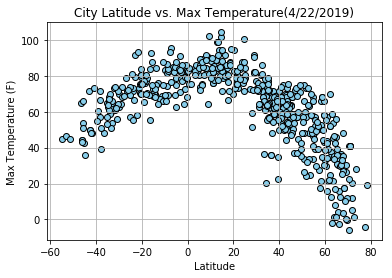

In [52]:
#Plot Latitude vs. Temprature 
latitude=weather_data["Lat"]
max_temp=weather_data["Max Temp"]

Temprature=plt.scatter(latitude,max_temp, marker="o",facecolors="skyblue", edgecolors="black", linewidth=1)

#add grid lines
plt.grid()

#add title and axis names
plt.title("City Latitude vs. Max Temperature(4/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Save Figure
plt.savefig("Output/Temperature.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

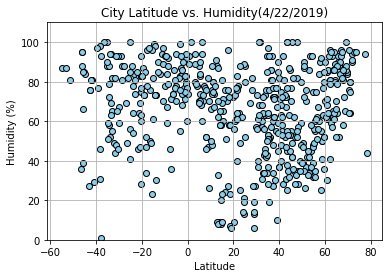

In [55]:
#Plot  Latitude vs. Humidity 
humidity=weather_data["Humidity"]

Temprature=plt.scatter(latitude,humidity, marker="o",facecolors="skyblue", edgecolors="black", linewidth=1)

#add grid lines
plt.grid()

#add title and axis names
plt.title("City Latitude vs. Humidity(4/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Add limit to y-axis
plt.ylim(0,110)
#Save Figure
plt.savefig("Output/Humidity.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

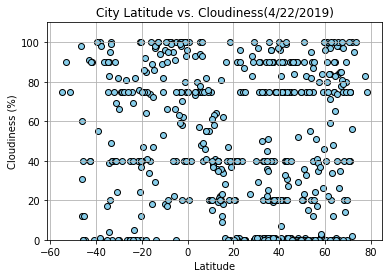

In [56]:
#Plot  Latitude vs. Cloudiness 
cloudiness=weather_data["Cloudiness"]

Temprature=plt.scatter(latitude,cloudiness, marker="o",facecolors="skyblue", edgecolors="black", linewidth=1)

#add grid lines
plt.grid()

#add title and axis names
plt.title("City Latitude vs. Cloudiness(4/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Add limit to y-axis
plt.ylim(0,110)
#Save Figure
plt.savefig("Output/Cloudiness.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

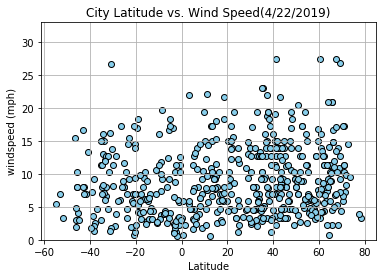

In [61]:
#Plot  Latitude vs. Windspeed 
windspeed=weather_data["Wind Speed"]

Temprature=plt.scatter(latitude,windspeed, marker="o",facecolors="skyblue", edgecolors="black", linewidth=1)

#add grid lines
plt.grid()

#add title and axis names
plt.title("City Latitude vs. Wind Speed(4/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("windspeed (mph)")

#Add limit to y-axis
plt.ylim(0,33)
#Save Figure
plt.savefig("Output/Wind Speed.png", bbox_inches="tight")

# Show plot
plt.show()